# Interpolating Data

> Alex Woodall <br>
> Auckland Bioengineering Institute <br>
> University of Auckland, New Zealand

There are two stages which occur during one stride, the stance phase ($\sim$60 %) and the swing phase ($\sim$40 %).

To compare different motion trials and to analyse a single gait trial, we need to look at the kinematics/kinetics during the stance phase. 

![alt text](images/stance_phase.png "Stance Phase")

There are 4 stages during the stance phase:
* HS: Heel Strike
* CTO: Contralateral Toe Off
* CHS: Contralateral Heel Strike
* TO: Toe Off

Generally, one stride phase can be considered from HS to HS.

To look at the stance phase, it is helpful to view the phase out of 100 %. This is where interpolating the data becomes useful.

Start by importing the libraries needed to run the task.

In [1]:
import numpy as np
from numpy import matlib
import os
import tkinter as tk
from tkinter import filedialog

import matplotlib.pyplot as plt

from scipy import interpolate

## Reading a motion file

We need to read in the motion file of the trial. You can obtain the .mot file from inverse kinematics from OpenSim. You can also write a motion file from an .sto file (output of inverse dynamics from OpenSim) using the appropriate Python notebook (WriteMotionFile.ipynb) - __!!link notebook when completed!!__

### Load the motion file

In [2]:
root = tk.Tk()
root.withdraw()

file_path = filedialog.askopenfilename(initialdir = "r",title = "Select file",filetypes = (("mot files","*.mot"),("all files","*.*")))

# Split into file_name and path_name
file_name = file_path.rsplit('/',1)[-1]
path_name = file_path.rsplit('/',1)[0]

# Open mot file with read only access
mot_fid = open(os.path.join(path_name, file_name),'r')

mot_lines = mot_fid.readlines()
mot_fid.close()

### View the motion file

In this example, we will be reading the _walk.mot_ file. To get a feel for what the file looks like, open the file in a txt reader. The first line of data that is useful in this file is the 8th line. However, this may be different in another file, so always check first.

In [3]:
# First line of data is on line 8, check this in your own .mot file and change accordingly
mot_data = mot_lines[8:]

data = []

# Split into an array for easier manipulation
for i in range(len(mot_data)):
    tmp = [float(i) for i in mot_data[i].split()]
    data.append(tmp)

# Convert to array of floats
data = np.array(data)

### Getting data

Once we have the file, we can now take the data which we require. Once again, check in the motion file to make sure that you are taking the correct array (remember, Python starts indexing from __0__).

In [4]:
# Pull out wanted arrays
time = data[:,0] # Time
Rknee_flexion = data[:,3] # Right knee flexion

## Interpolation

### Point selection

To interpolate the data between the stride phase (or between which ever phase you would like), we need to select the coordinates of the start and end of the phase.

Simply click on the start point then on the end point. The red cross hair will appear when you click on the first point, and will disappear when you click on the second.

NB: The plot opens up in a new tab

In [9]:
%matplotlib qt

# Select points of interest for your spline interpolation
fig = plt.figure()
plt.plot(time, Rknee_flexion)
plt.title("Select START and END point for Spline Interpolation")
plt.xlabel("Time (s)")
plt.ylabel("Angle (deg)")

x0y0,x1y1 = plt.ginput(n=2)

plt.show()

### Interpolate

We can now use a cubic spline interpolation.

Select the number of points that we want to interpolate. Because we want the phase to be out of 100 %, we will interpolate 100 points.

In [10]:
# Select the number of points to interpolate
ninterpolates_points = 100

# Create the new time array for interpolation
new_x = np.linspace(x0y0[0], x1y1[0], ninterpolates_points)

# Interpolate using the cubic spline
tck = interpolate.splrep(time, Rknee_flexion, s=0)

new_data = interpolate.splev(new_x, tck, der=0)

## Visualise interpolated points

Now view the interpolated points as a % stance (or whichever phase you chose).

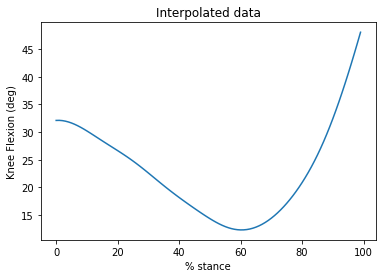

In [7]:
%matplotlib inline

# Plot splined data
fig = plt.figure()
plt.plot(new_data)
plt.title("Interpolated data")
plt.xlabel("% stance")
plt.ylabel("Knee Flexion (deg)")

plt.show()